In [1]:
import os
cmap = "gray"

# Guide
<hr style="border:2px solid gray">
This guide will run through the installation and basic usage of the solar mask library.

## Installation
***
The package is availble on pypi [here](https://pypi.org/project/solarmask/). To download, use the latest version of pip:

```bash
$ python3 -m pip install solarmask
```

Versioning is being fleshed out so that major bugs don't exist in a version. Currently, the latest release the the most updated version.

## ActiveRegion class
***
The main entry point to solarmask is **active_region**. Active regions have three subclasses: **ActiveRegionParameters** which extracts parameters, **ActiveRegionDerivedFields** which constructs new fields based on the Bz, Bx, By and continuum fields that are stored on the disk (such as horizontal B field Bh or Twist etc.) and **ActiveRegionSegmentation** which only deals with the segmentation of an active region into neutral lines, umbras, penumbras and a background. All of these classes can be called from their respective modules, but the user is encouraged to use all of these subclasses' functionality directly from the ActiveRegion class to avoid confusion.

To construct an active region, you need a harpnumber, date and root. The harpnumber and date are self explanitory, and the root is the location of the raw data folder containing magnetogram and continuum data.

First, let's define our root directory. If you use this code on a different system, change the cell below to your re located data folder - which should look similar to /docs/example_data/raw

In [2]:
root = "../example_data/raw"
assert os.path.exists(root)

Next, we could manually get a harpnumber and date if we know what is on our system, but solarmask will automatically detect harpnumbers and dates in the root directory. Lets find all of our harpnumbers first:

In [3]:
from solarmask.data import get_hnums
hnums = get_hnums(root)
print(hnums)
hnum = hnums[0]

[7115]


If we new each date in each harpnumber we are using, we could just manually build a datetime, but solarmask also automatically detects which dates are available in root:

In [4]:
from solarmask.data import get_dates
dates = get_dates(hnum, root)
print(dates)
date = dates[0]

[datetime.datetime(2017, 9, 6, 12, 0), datetime.datetime(2017, 9, 1, 22, 0)]


Now we have a valid harpnumber and date combo to build our active region with. Of course, we could manually define these two as well:

In [5]:
print(hnum, date)

7115 2017-09-06 12:00:00


Now let's build an active region:

In [6]:
from solarmask.active_region import ActiveRegion

ar = ActiveRegion(hnum, date, root)

An active region alone is just a combination of x, y, z components of magnetic flux and the continuum:

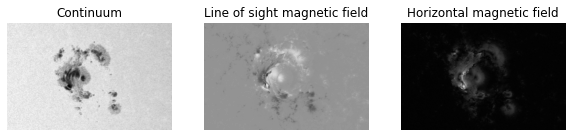

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(ar.cont, cmap)
ax1.set_title("Continuum")
ax1.axis(False)

ax2.imshow(ar.Bz, cmap)
ax2.set_title("Line of sight magnetic field")
ax2.axis(False)

ax3.imshow(ar.Bh, cmap)
ax3.set_title("Horizontal magnetic field")
ax3.axis(False)

fig.set_figwidth(10)

plt.show()

### Three Datasets

The main usage of active region is to extract the three datasets.

Each dataset is a dict with key value corresponding to each feature.

In [8]:
baseline = ar.baseline_dataset
print("BASELINE Dataset")
print(baseline)

BASELINE Dataset
{'Bz_tot': 48436571.73000002, 'Bz_totabs': 912665.0699999997, 'itot': 1158731875.8816144, 'itotabs': 513884.65279076196, 'itot_polarity': 69741420.32692963, 'ihtot': 260424630525.3697, 'ihtotabs': 3658852029.034691, 'hctot': 346536044344.56824, 'hctotabs': 152841919638.9422, 'totrho': 21887487.611776374, 'Bz_mean': 2.9610447920992518, 'Bz_std': 353.91205722553934, 'Bz_skew': 0.8624891360407722, 'Bz_kurt': 15.705697123960512, 'Bh_mean': 181.74443637163253, 'Bh_std': 301.11945941453774, 'Bh_skew': 4.275037651713445, 'Bh_kurt': 27.07156202696789, 'gamma_mean': -0.1003125604687583, 'gamma_std': 0.6785771694077445, 'gamma_skew': 0.20137146281062596, 'gamma_kurt': -1.0749836556997958, 'grad_B_mean': 49.819821037258365, 'grad_B_std': 72.48970397795553, 'grad_B_skew': 10.687045428877381, 'grad_B_kurt': 214.83928901171123, 'grad_Bz_mean': 51.636673855447874, 'grad_Bz_std': 81.89618924956946, 'grad_Bz_skew': 9.117129105709143, 'grad_Bz_kurt': 162.31031800893274, 'grad_Bh_mean': 

In [9]:
segmented = ar.segmented_dataset
print("SEGMENTED Dataset")
print(segmented)

SEGMENTED Dataset
{'nl_Bz_tot': 1730154.0, 'nl_Bz_totabs': 74285.20000000001, 'nl_itot': 72911186.77918473, 'nl_itotabs': 5502452.308782724, 'nl_itot_polarity': 8855326.523065047, 'nl_ihtot': 77831129621.29727, 'nl_ihtotabs': 246844235.33597994, 'nl_hctot': 57063866401.77635, 'nl_hctotabs': 12216768812.036888, 'nl_totrho': 6131235.380608724, 'nl_Bz_mean': -18.233971526755035, 'nl_Bz_std': 723.3068414530032, 'nl_Bz_skew': -0.5455602300328546, 'nl_Bz_kurt': 5.615103176236618, 'nl_Bh_mean': 1132.8273410495333, 'nl_Bh_std': 851.3247532920949, 'nl_Bh_skew': 1.189955019812326, 'nl_Bh_kurt': 1.2650226810732885, 'nl_gamma_mean': 0.0018664835082713447, 'nl_gamma_std': 0.5023637771433762, 'nl_gamma_skew': 0.09755952858633657, 'nl_gamma_kurt': 0.6208295788868163, 'nl_grad_B_mean': 250.90027949302583, 'nl_grad_B_std': 349.3953113840282, 'nl_grad_B_skew': 3.0308016114527065, 'nl_grad_B_kurt': 10.88481453737684, 'nl_grad_Bz_mean': 344.88730013572416, 'nl_grad_Bz_std': 383.2043553122473, 'nl_grad_Bz_

In [10]:
sharps = ar.sharps_dataset
print("SHARPS Dataset")
print(sharps)

SHARPS Dataset
{'USFLUX': 4.533103e+22, 'MEANGAM': 51.792, 'MEANGBT': 110.105, 'MEANGBZ': 126.385, 'MEANGBH': 76.954, 'MEANJZD': -0.31327546, 'TOTUSJZ': 100571700000000.0, 'MEANALP': -0.06190259, 'MEANJZH': -0.03697439, 'TOTUSJH': 7357.481, 'ABSNJZH': 2271.374, 'SAVNCPP': 78371730000000.0, 'MEANPOT': 21630.71, 'TOTPOT': 1.764815e+24, 'MEANSHR': 45.785, 'SHRGT45': 47.17, 'R_VALUE': 5.305}


## Segments / Masks

```python
solarmask.active_region_segments.ActiveRegionSegments
``` 

is a class that segments the original four data products into an umbra, neutral line, penumbra and background, but as stated, use these with the ActiveRegion class

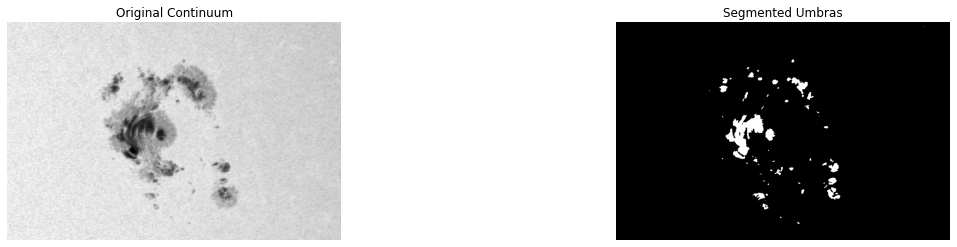

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(ar.cont, cmap)
ax1.axis(False)
ax1.set_title("Original Continuum")

ax2.imshow(ar.umbra_mask, cmap)
ax2.axis(False)
ax2.set_title("Segmented Umbras")

fig.set_figwidth(20)
fig.set_figwidth(20)

plt.show()

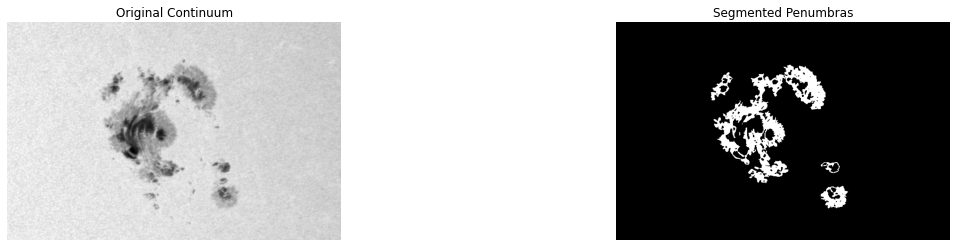

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(ar.cont, cmap)
ax1.axis(False)
ax1.set_title("Original Continuum")

ax2.imshow(ar.penumbra_mask, cmap)
ax2.axis(False)
ax2.set_title("Segmented Penumbras")

fig.set_figwidth(20)
fig.set_figwidth(20)

plt.savefig("./outputs/penumbras.png")
plt.show()

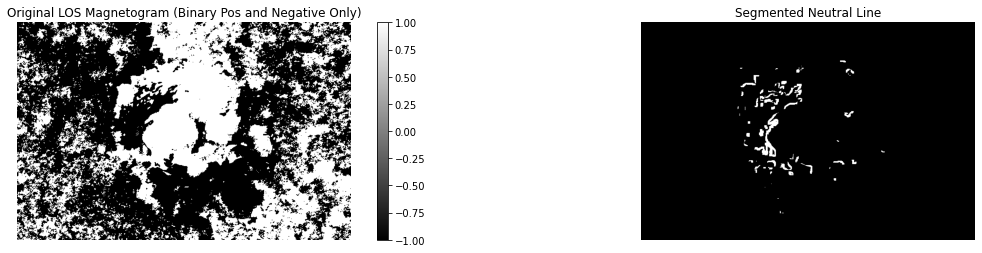

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

Bz = ar.Bz.copy()
Bz[Bz > 0] = 1
Bz[Bz < 0] = -1
pcm = ax1.imshow(Bz, cmap)
ax1.axis(False)
ax1.set_title("Original LOS Magnetogram (Binary Pos and Negative Only)")
fig.colorbar(pcm, ax = ax1)

ax2.imshow(ar.nl_mask, cmap)
ax2.axis(False)
ax2.set_title("Segmented Neutral Line")

fig.set_figwidth(20)
fig.set_figwidth(20)

plt.savefig("./outputs/nl.png")
plt.show()

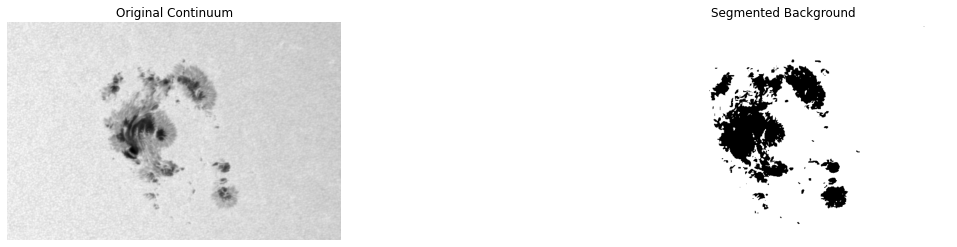

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(ar.cont, cmap)
ax1.axis(False)
ax1.set_title("Original Continuum")

ax2.imshow(ar.background_mask, cmap)
ax2.axis(False)
ax2.set_title("Segmented Background")

fig.set_figwidth(20)
fig.set_figwidth(20)

plt.savefig("./outputs/background.png")
plt.show()

## Derived Fields
```python
solarmask.active_region_derived_fields.ActiveRegionDerivedFields
``` 

Here are the original fields (the raw data that is extracted from the disc).

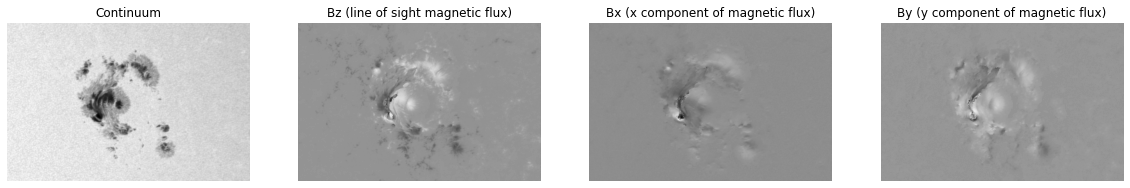

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

ax1.imshow(ar.cont, cmap)
ax1.axis(False)
ax1.set_title("Continuum")

ax2.imshow(ar.Bz, cmap)
ax2.axis(False)
ax2.set_title("Bz (line of sight magnetic flux)")

ax3.imshow(ar.Bx, cmap)
ax3.axis(False)
ax3.set_title("Bx (x component of magnetic flux)")

ax4.imshow(ar.By, cmap)
ax4.axis(False)
ax4.set_title("By (y component of magnetic flux)")

fig.set_figwidth(20)
fig.set_figwidth(20)

plt.show()

And all of the derived fields:

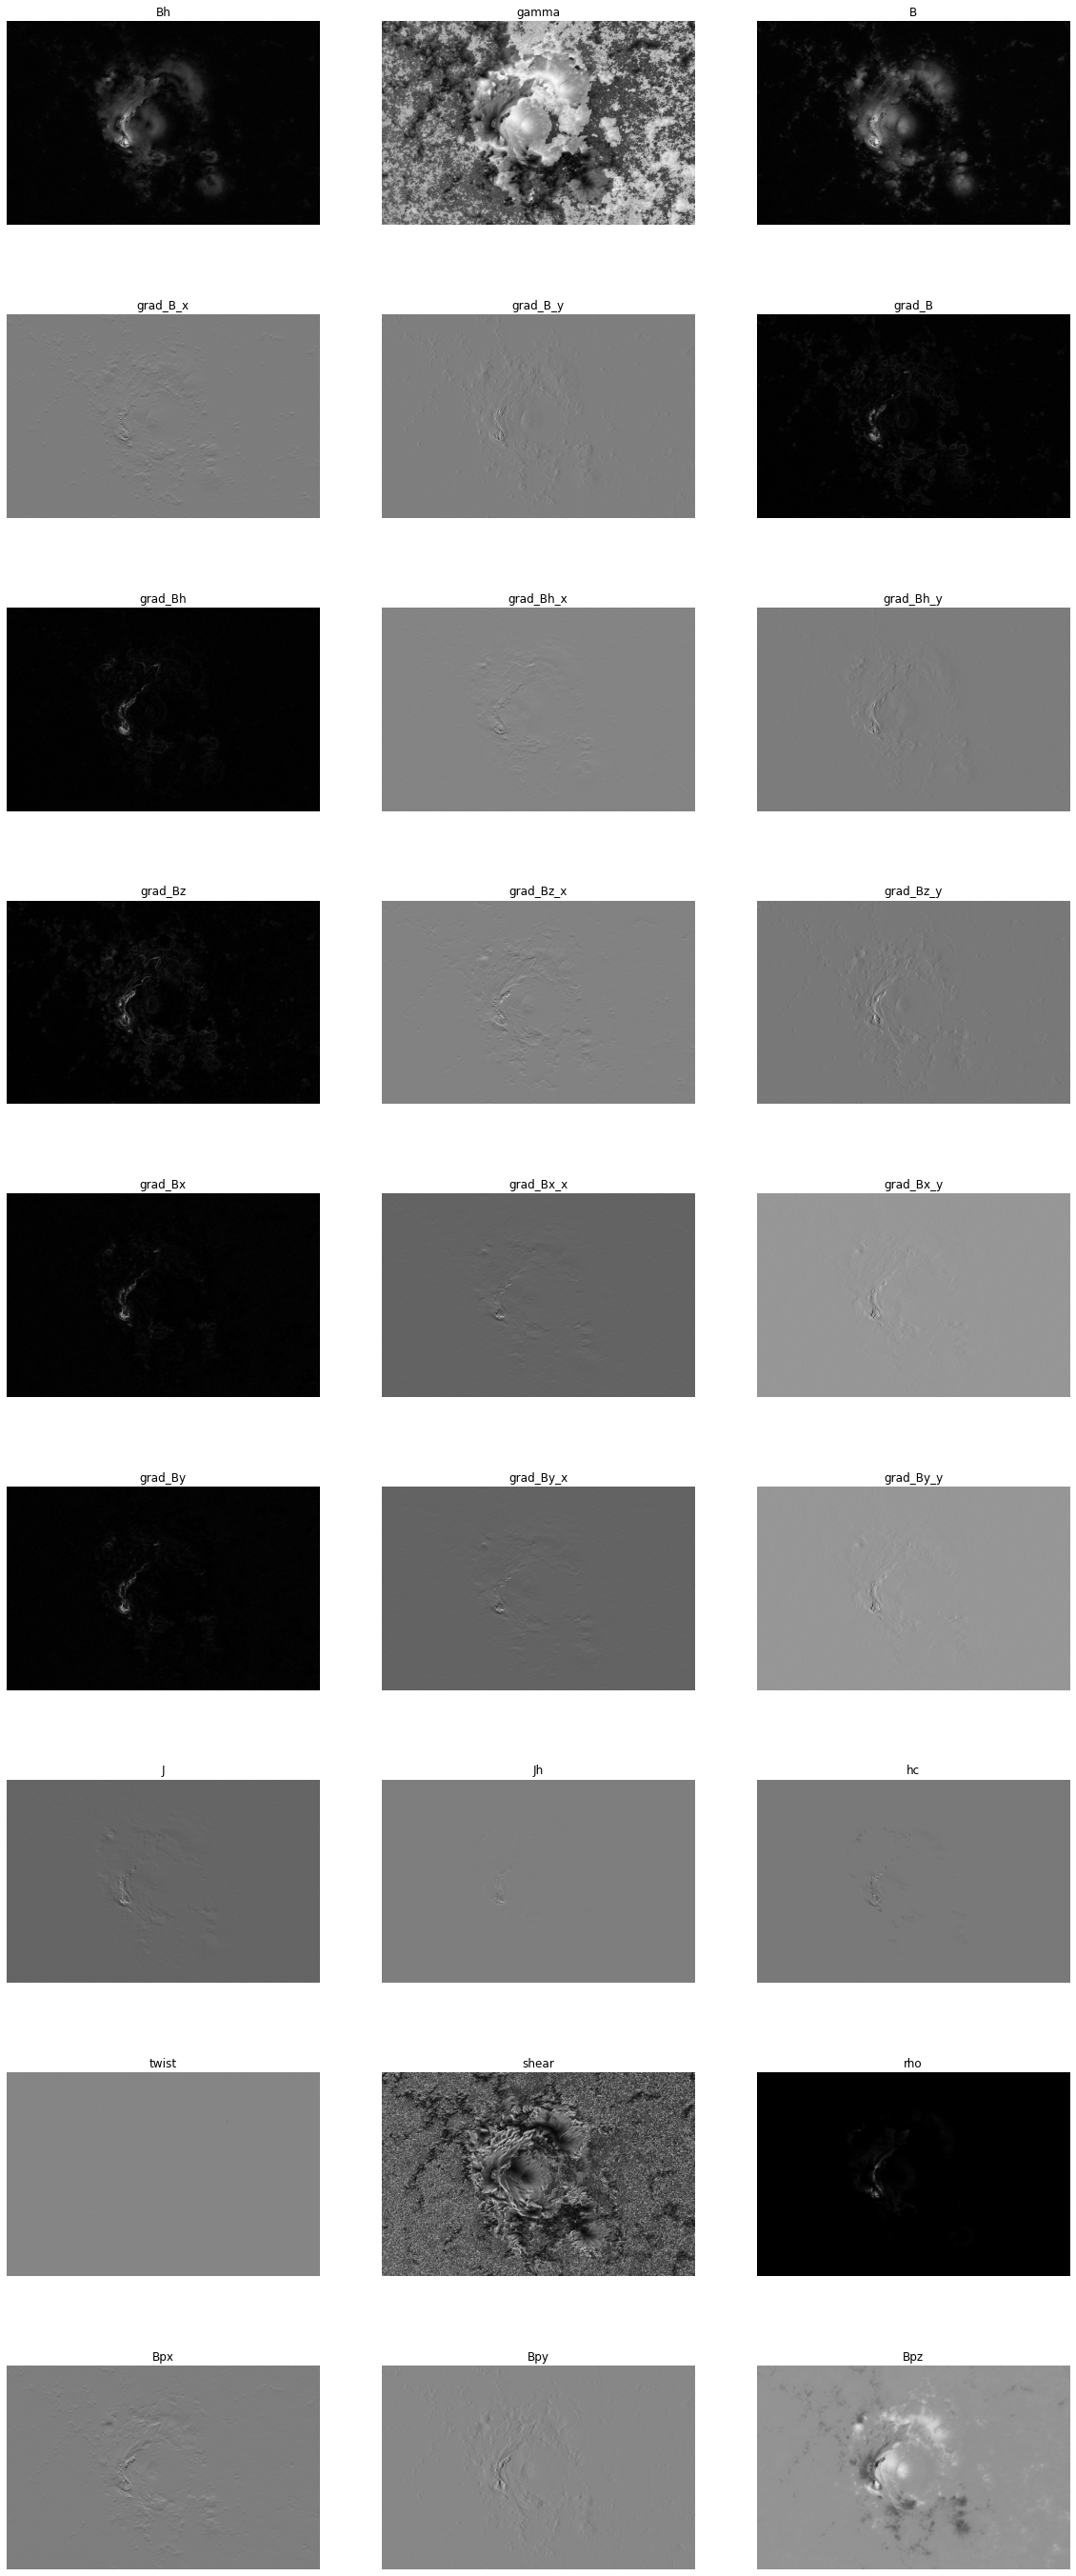

In [16]:
derived_fields = ["Bh", "gamma", "B", "grad_B_x", "grad_B_y", "grad_B", "grad_Bh", "grad_Bh_x", "grad_Bh_y", "grad_Bz", "grad_Bz_x", "grad_Bz_y", "grad_Bx", "grad_Bx_x", "grad_Bx_y", "grad_By", "grad_By_x", "grad_By_y", "J", "Jh", "hc", "twist", "shear", "rho", "Bpx", "Bpy", "Bpz"]

fig, axs = plt.subplots(9, 3)

k = 0
for i in range(9):
    for j in range(3):
        axs[i][j].imshow(getattr(ar, derived_fields[k]), cmap)
        axs[i][j].axis(False)
        axs[i][j].set_title(derived_fields[k])
        k += 1

fig.set_figwidth(20)
fig.set_figheight(50)
plt.show()

## Parameters
```python
solarmask.active_region_parameters.ActiveRegionParameters
``` 

Parameters are computed using a binary mask. To demonstrate, we will first compute the parameter on the entire region, then on a randomized binary mask

Parameters are either single scalars (for example, the sum of flux over the mask), or expressed as the first four statistical moments of a magnetic field (average, standard deviation, skew and kurtosis). 

#### Scalar Parameters:

In [17]:
full_mask = np.ones(ar.shape, dtype = bool)

for func in ar.scalar_features:
    rmask = np.random.choice([True, False], ar.shape)
    
    full_data = func(full_mask)
    rmask_data = func(rmask)
    
    print(func.__name__)
    print(f"    Full Mask: {full_data:.2f}")
    print(f"    Rand Mask: {rmask_data:.2f}")

Bz_tot
    Full Mask: 48436571.73
    Rand Mask: 24166936.01
Bz_totabs
    Full Mask: 912665.07
    Rand Mask: 484950.29
itot
    Full Mask: 1158731875.88
    Rand Mask: 580027916.47
itotabs
    Full Mask: 513884.65
    Rand Mask: 2932016.42
itot_polarity
    Full Mask: 69741420.33
    Rand Mask: 36128169.30
ihtot
    Full Mask: 260424630525.37
    Rand Mask: 131237311628.62
ihtotabs
    Full Mask: 3658852029.03
    Rand Mask: 3103011378.85
hctot
    Full Mask: 346536044344.57
    Rand Mask: 172267782225.89
hctotabs
    Full Mask: 152841919638.94
    Rand Mask: 72413133070.69
totrho
    Full Mask: 21887487.61
    Rand Mask: 10903698.75


#### Stastical Parameters of Fields:

Bz


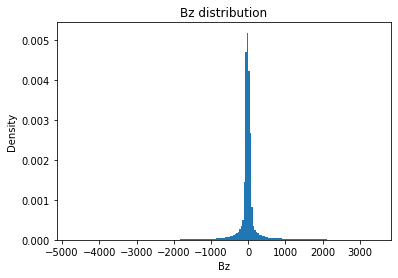

    Bz_mean
        Full Mask: 2.96
        Rand Mask: 3.02
    Bz_std
        Full Mask: 353.91
        Rand Mask: 355.30
    Bz_skew
        Full Mask: 0.86
        Rand Mask: 0.82
    Bz_kurt
        Full Mask: 15.71
        Rand Mask: 15.94
Bh


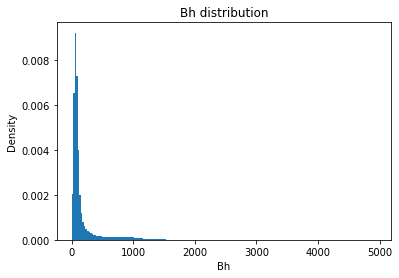

    Bh_mean
        Full Mask: 181.74
        Rand Mask: 181.44
    Bh_std
        Full Mask: 301.12
        Rand Mask: 299.84
    Bh_skew
        Full Mask: 4.28
        Rand Mask: 4.23
    Bh_kurt
        Full Mask: 27.07
        Rand Mask: 26.36
gamma


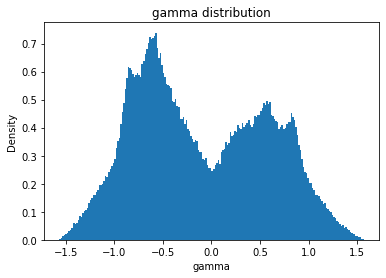

    gamma_mean
        Full Mask: -0.10
        Rand Mask: -0.10
    gamma_std
        Full Mask: 0.68
        Rand Mask: 0.68
    gamma_skew
        Full Mask: 0.20
        Rand Mask: 0.20
    gamma_kurt
        Full Mask: -1.07
        Rand Mask: -1.07
grad_B


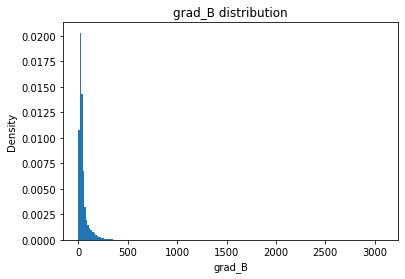

    grad_B_mean
        Full Mask: 49.82
        Rand Mask: 49.69
    grad_B_std
        Full Mask: 72.49
        Rand Mask: 71.83
    grad_B_skew
        Full Mask: 10.69
        Rand Mask: 10.38
    grad_B_kurt
        Full Mask: 214.84
        Rand Mask: 201.05
grad_Bz


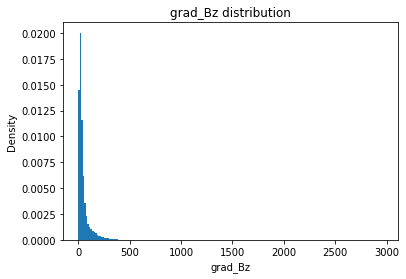

    grad_Bz_mean
        Full Mask: 51.64
        Rand Mask: 51.64
    grad_Bz_std
        Full Mask: 81.90
        Rand Mask: 82.53
    grad_Bz_skew
        Full Mask: 9.12
        Rand Mask: 9.45
    grad_Bz_kurt
        Full Mask: 162.31
        Rand Mask: 175.72
grad_Bh


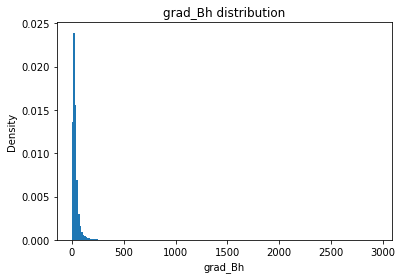

    grad_Bh_mean
        Full Mask: 37.43
        Rand Mask: 37.44
    grad_Bh_std
        Full Mask: 59.76
        Rand Mask: 59.28
    grad_Bh_skew
        Full Mask: 14.68
        Rand Mask: 14.55
    grad_Bh_kurt
        Full Mask: 346.62
        Rand Mask: 334.47
J


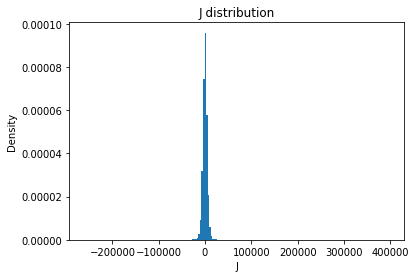

    J_mean
        Full Mask: 1.67
        Rand Mask: -7.25
    J_std
        Full Mask: 6921.27
        Rand Mask: 6803.49
    J_skew
        Full Mask: 5.78
        Rand Mask: 4.36
    J_kurt
        Full Mask: 329.21
        Rand Mask: 279.52
Jh


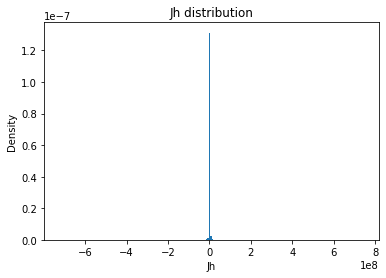

    Jh_mean
        Full Mask: 11870.76
        Rand Mask: -3903.42
    Jh_std
        Full Mask: 7499866.04
        Rand Mask: 7291553.43
    Jh_skew
        Full Mask: 8.10
        Rand Mask: -4.79
    Jh_kurt
        Full Mask: 2704.46
        Rand Mask: 3471.61
twist


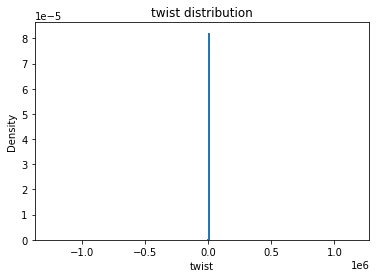

    twist_mean
        Full Mask: -5.38
        Rand Mask: -11.19
    twist_std
        Full Mask: 5431.10
        Rand Mask: 5616.44
    twist_skew
        Full Mask: 19.27
        Rand Mask: -4.17
    twist_kurt
        Full Mask: 22725.39
        Rand Mask: 30353.33
hc


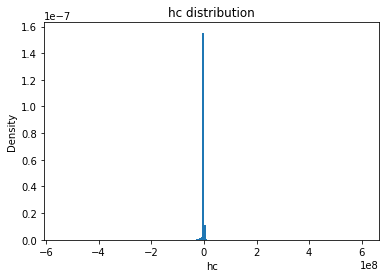

    hc_mean
        Full Mask: -495879.36
        Rand Mask: -513499.04
    hc_std
        Full Mask: 7445779.22
        Rand Mask: 7413225.13
    hc_skew
        Full Mask: -7.80
        Rand Mask: -12.93
    hc_kurt
        Full Mask: 1132.95
        Rand Mask: 1220.15
shear


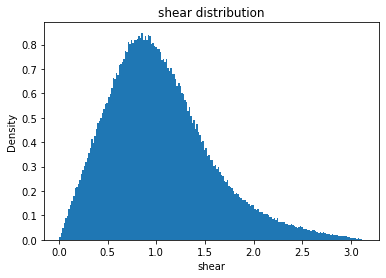

    shear_mean
        Full Mask: 1.04
        Rand Mask: 1.04
    shear_std
        Full Mask: 0.53
        Rand Mask: 0.53
    shear_skew
        Full Mask: 0.77
        Rand Mask: 0.77
    shear_kurt
        Full Mask: 0.62
        Rand Mask: 0.61
rho


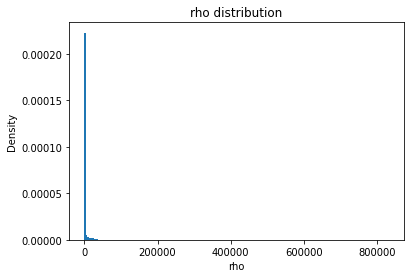

    rho_mean
        Full Mask: 1784.72
        Rand Mask: 1777.62
    rho_std
        Full Mask: 10948.43
        Rand Mask: 10749.47
    rho_skew
        Full Mask: 20.26
        Rand Mask: 19.21
    rho_kurt
        Full Mask: 661.46
        Rand Mask: 554.70


In [18]:
from solarmask.utils import stat_moment_label, stat_moment # labels and gets mean, std, skew and kurtosis from a given set of data

for func in ar.stat_moments:
    print(func)
    rmask = np.random.choice([True, False], ar.shape)

    field = getattr(ar, func)
    
    plt.hist(field.flatten(), density = True, bins = 200)
    plt.title(func + " distribution")
    plt.xlabel(func)
    plt.ylabel("Density")
    plt.show()
    
    
    labels = stat_moment_label(func)
    values_full = stat_moment(field[full_mask])
    values_rand = stat_moment(field[rmask])
    
    for label, f, r in zip(labels, values_full, values_rand):
        print(f"    {label}")
        print(f"        Full Mask: {f:.2f}")
        print(f"        Rand Mask: {r:.2f}")

## Reading and Writing Binary Masks to the Disk

The four segments (neutral line, umbra, penumbra and neutral line) can be written to the disk as binary files. This is a very compressed version of the map where the first 8 bytes represent the shape of the data, and the remaining data is a *bitstring* that contains 1's and 0's where pixels are true or false.

In [26]:
nl_mask = ar.nl_mask
um_mask = ar.umbra_mask
pu_mask = ar.penumbra_mask
bk_mask = ar.background_mask

from solarmask.data import write_mask, read_mask

write_mask(nl_mask, hnum, date, "./masks/nl")
nl_mask_2 = read_mask(hnum, date, "./masks/nl")
assert np.all(nl_mask == nl_mask_2)

write_mask(um_mask, hnum, date, "./masks/umbra")
um_mask_2 = read_mask(hnum, date, "./masks/umbra")
assert np.all(um_mask == um_mask_2)

write_mask(pu_mask, hnum, date, "./masks/penumbra")
pu_mask_2 = read_mask(hnum, date, "./masks/penumbra")
assert np.all(pu_mask == pu_mask_2)

write_mask(bk_mask, hnum, date, "./masks/background")
bk_mask_2 = read_mask(hnum, date, "./masks/background")
assert np.all(bk_mask == bk_mask_2)

Don't worry, you don't need to know how the process works below. If you are curious, here is the compression algorithm:

A mask that looked like this:

True False True  False True

True True  True  True  True

True True  True  True  True

True True  True  False True

True False False True  True

Would be converted to:

1 0 1 0 1

1 1 1 1 1

1 1 1 1 1

1 1 1 0 1

1 0 0 1 1

Then flattened:

1010111111111111110110011

Buffered by 0's so the length is a multiple of 8:

00000001010111111111111110110011


Converted to bytes:

00000001 01011111 11111111 10110011

0x01 0x5F 0xFF 0xB3 

Then we add the shape (5 x 5) = (0x00 0x00 0x00 0x05 0x00 0x00 0x00 0x05) to the beginning:

0x00 0x00 0x00 0x05 0x00 0x00 0x00 0x05 0x01 0x5F 0xFF 0xB3 


Note that if everything is False, I just have the shape of the mask (no proceeding data)

Let's see this in action. If a mask is size nxm, then the number of bits in the bit string is nm, the number of buffer bits is nm % 8, and the number of prefix bits is 2x4x8 = 64 so the number of bytes is going to be nm + (nm % 8) + 64 plus one null terminator byte

Then the total number of bytes in a file is (nm + (nm % 8) + 64) / 8 + 1

In [36]:
n, m = nl_mask.shape

print((n*m + ((n * m) % 8) + 64) / 8 + 1)

f_size = os.stat("./masks/nl/sharp_7115/mask_7115_20170906_120000.bin").st_size

print(f_size)

38537.0
38537
